# Notebook Title

`Anugrah Yoga Pratama - Batch 10`

## Description

### Objective

`Image processing using the concept of linear algebra and calculus`

### Problem Statement

`Write your problem statement here`

## Working Area

### Import Library

In [1]:
import scipy
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

3. Data Loading

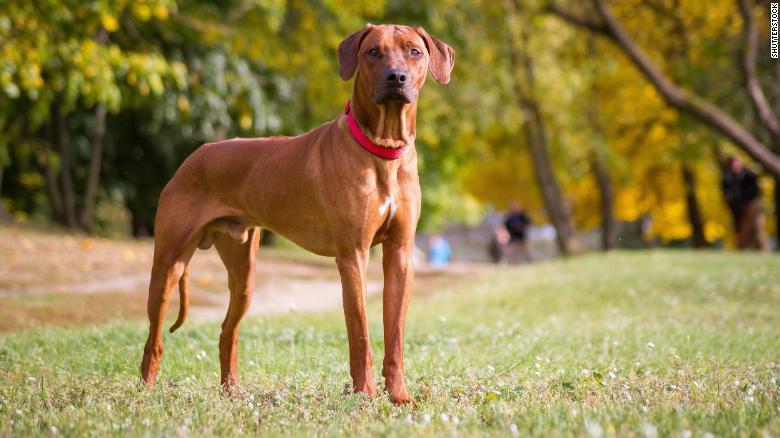

In [2]:
image = Image.open(r'Image_dataset.jpg')
image

In [3]:
print(image.format)
print(image.mode)
print(image.size)

JPEG
RGB
(780, 438)


In [4]:
np.array(image).shape

(438, 780, 3)

4. Data Preprocessing/Cleaning

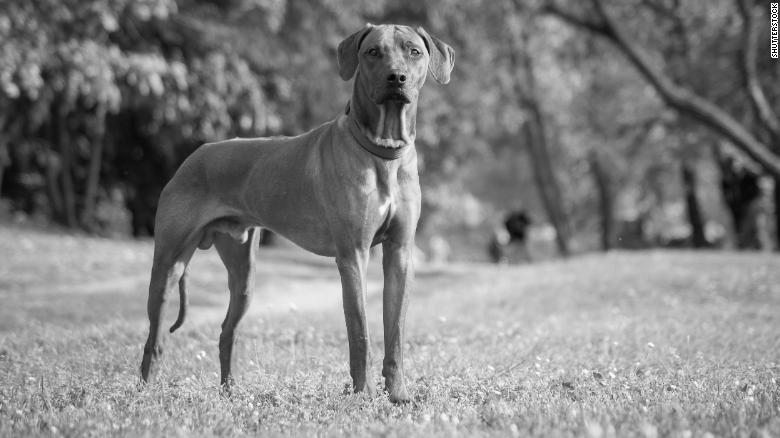

In [5]:
img_gs = image.convert('L')
img_gs

5. Image Processing

In [6]:
img_arr = np.array(img_gs)
img_arr

array([[ 85,  85,  83, ...,  40,  38,  51],
       [ 76,  76,  75, ...,  38,  56,  29],
       [ 64,  65,  65, ...,  48,  36,  60],
       ...,
       [150, 144, 134, ..., 136, 135, 131],
       [149, 142, 132, ..., 141, 139, 134],
       [149, 142, 131, ..., 146, 143, 136]], dtype=uint8)

In [7]:
len_x = img_arr.shape[1]
len_y = img_arr.shape[0]
print(len_x)
print(len_y)

780
438


In [8]:
x = np.arange(len_x)
y = np.arange(len_y)

dx, dy = np.gradient(img_arr)

In [9]:
dx

array([[ -9. ,  -9. ,  -8. , ...,  -2. ,  18. , -22. ],
       [-10.5, -10. ,  -9. , ...,   4. ,  -1. ,   4.5],
       [ -9. ,  -9. ,  -8. , ..., 107.5, -14. ,  20. ],
       ...,
       [ -0.5,  -2. ,  -2.5, ...,   2. ,   1.5,   1. ],
       [ -0.5,  -1. ,  -1.5, ...,   5. ,   4. ,   2.5],
       [  0. ,   0. ,  -1. , ...,   5. ,   4. ,   2. ]])

In [10]:
dy

array([[  0. ,  -1. ,  -2.5, ...,  -1.5,   5.5,  13. ],
       [  0. ,  -0.5,  -1. , ...,   6. ,  -4.5, -27. ],
       [  1. ,   0.5,   0.5, ...,  -3. ,   6. ,  24. ],
       ...,
       [ -6. ,  -8. ,  -9.5, ...,   1. ,  -2.5,  -4. ],
       [ -7. ,  -8.5,  -8.5, ...,   0.5,  -3.5,  -5. ],
       [ -7. ,  -9. ,  -9. , ...,  -0.5,  -5. ,  -7. ]])

In [11]:
grad_m = np.sqrt(dx**2 + dy**2)
grad_m


array([[  9.        ,   9.05538514,   8.38152731, ...,   2.5       ,
         18.82153022,  25.55386468],
       [ 10.5       ,  10.0124922 ,   9.05538514, ...,   7.21110255,
          4.60977223,  27.37243139],
       [  9.05538514,   9.01387819,   8.01560977, ..., 107.54185232,
         15.23154621,  31.2409987 ],
       ...,
       [  6.02079729,   8.24621125,   9.82344135, ...,   2.23606798,
          2.91547595,   4.12310563],
       [  7.01783442,   8.55862138,   8.63133825, ...,   5.02493781,
          5.31507291,   5.59016994],
       [  7.        ,   9.        ,   9.05538514, ...,   5.02493781,
          6.40312424,   7.28010989]])

In [12]:
grad_m.max()

179.9590231135966

In [13]:
def thrshold(val):
    for j in range(len_y): # --> 438
        for i in range(len_x): # --> 780
            if grad_m[j,i] > val:
                img_arr[j,i] = 255
            else:
                img_arr[j,i] = 0 
    return img_arr

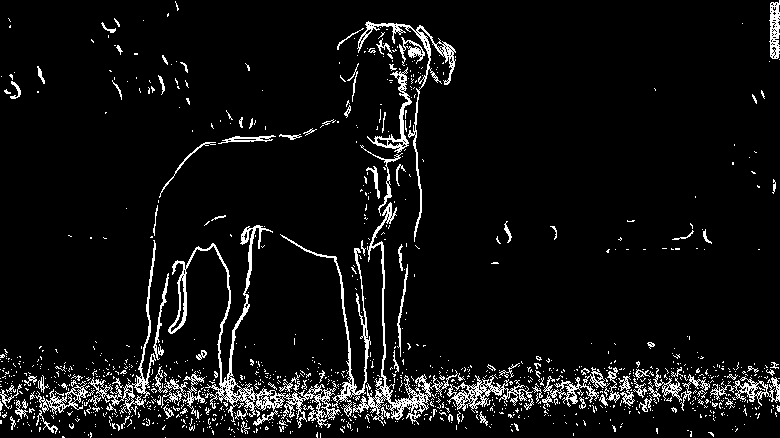

In [14]:
newimage1 = Image.fromarray(thrshold(20))
newimage1

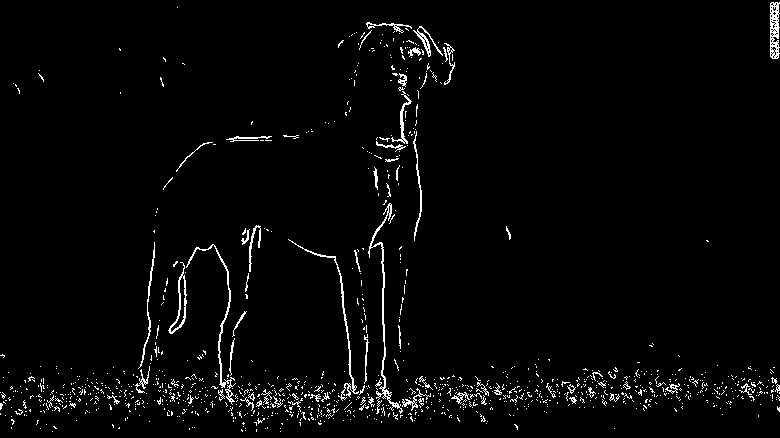

In [15]:
newimage2 = Image.fromarray(thrshold(30))
newimage2

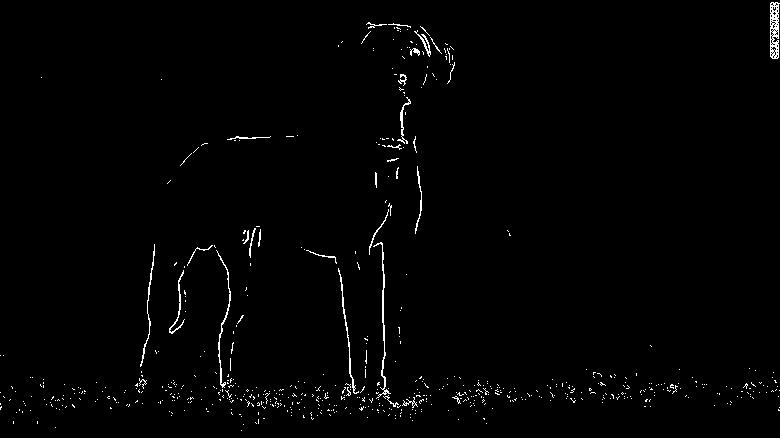

In [16]:
newimage3 = Image.fromarray(thrshold(40))
newimage3

In [29]:
rand_matrix = np.random.int(len_y, len_x)
new_matrix = rand_matrix*thrshold(20)
new_matrix

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 159.65600442],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 226.22988186],
       [  0.        ,   0.        ,   0.        , ...,  29.70615454,
          0.        , 213.62608717],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [31]:
img_rand = Image.fromarray(matrixnew)
img_rand

AttributeError: 'function' object has no attribute '__array_interface__'

## Conclusions, Assumptions, Overall Analysis

1. Semakin besar nilai threshold, maka edge akan semakin sedikit terdeteksi. 
2. Semakin kecil nilai threshold, maka edge akan semakin mudah terdeteksi .
3. Threshold terbaik di angka sekitar 20-25 karena edge dari bentuk badan hewan yang ada di gambar dapat terlihat jelas.
